In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"C:\Users\where\OneDrive\바탕 화면\Netflix\netflix.csv"
netflix = pd.read_csv(file_path) 

In [3]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 결측치 비율 확인하기

In [5]:
# .isna( ) : 결측 값은 True 반환, 그 외에는 False 반환
for i in netflix.columns :
    missingValueRate = netflix[i].isna().sum() / len(netflix) * 100 
    if missingValueRate > 0 :
        print("{} null rate: {}%".format(i,round(missingValueRate, 2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


# 결측치 처리하기

In [6]:
netflix['country'].fillna('No Data', inplace  = True)
# 'country' 열의 결측치(NaN)를 'No Data'라는 문자열로 채운다

C:\Users\where\AppData\Local\Temp\ipykernel_31640\4088859008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['country'].fillna('No Data', inplace  = True)


In [7]:
netflix['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix['director'].replace(np.nan, 'No Data',inplace  = True)
# 'cast' 열 & 'director' 열의 결측치(NaN)를 'No Data'라는 문자열로 대체, 

C:\Users\where\AppData\Local\Temp\ipykernel_31640\436108940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['cast'].replace(np.nan, 'No Data',inplace  = True)
C:\Users\where\AppData\Local\Temp\ipykernel_31640\436108940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [8]:
netflix.dropna(axis = 0, inplace=True)
#여전히 결측치가 있는 행이 있는 경우엔 그 행을 제거한다. 


# 결측치 개수를 확인한다

In [9]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [10]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
# netflix["date_added"] = pd.to_datetime(netflix['date_added'])
# netflix["date_added"]

In [12]:
netflix['date_added'] = netflix['date_added'].str.strip()

In [13]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='%B %d, %Y')

In [14]:
netflix['year_added'] = netflix['date_added'].dt.year
netflix['year_added']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8790, dtype: int32

In [15]:
netflix['month_added'] = netflix['date_added'].dt.month
netflix['month_added']

0        9
1        9
2        9
3        9
4        9
        ..
8802    11
8803     7
8804    11
8805     1
8806     3
Name: month_added, Length: 8790, dtype: int32

In [16]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9


# Netflix Rating 

In [17]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
age_group = {
    'TV-MA': 'Adults',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-14': 'Young Adults',
    'TV-PG': 'Older Kids',
    'NR': 'Adults',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'NC-17': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults'
}

# age_group 변수 생성 및 rating 값을 매핑
netflix['age_group'] = netflix['rating'].map(age_group)

# 결과 확인
print(netflix)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          No Data   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          No Data   
4         s5  TV Show           Kota Factory          No Data   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          No Data   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               No Data  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [19]:
# 연령 그룹별 콘텐츠 분포 확인
age_group_distribution = netflix['age_group'].value_counts()
print(age_group_distribution)

age_group
Adults          4089
Young Adults    2157
Older Kids      1487
Kids             567
Teens            490
Name: count, dtype: int64


In [20]:
# 연령군과 TV Show / Movie의 관계 분석하기
age_type_crosstab = pd.crosstab(netflix['age_group'], netflix['type'])
print(age_type_crosstab)

type          Movie  TV Show
age_group                   
Adults         2940     1149
Kids            298      269
Older Kids      971      516
Teens           490        0
Young Adults   1427      730


In [21]:
for group in netflix['age_group'].unique():
    print(f"\nTop 10 genres for {group}:")
    top_genres = netflix[netflix['age_group'] == group]['listed_in'].value_counts().nlargest(10)
    for genre, count in top_genres.items():
        print(f"{genre}: {count}")


Top 10 genres for Teens:
Dramas: 38
Action & Adventure, Sci-Fi & Fantasy: 37
Comedies, Romantic Movies: 30
Comedies: 29
Dramas, Romantic Movies: 24
Action & Adventure: 23
Action & Adventure, Comedies: 22
Documentaries: 14
Horror Movies, Thrillers: 14
Comedies, Dramas, Independent Movies: 12

Top 10 genres for Adults:
Stand-Up Comedy: 296
Dramas, International Movies: 172
Dramas, Independent Movies, International Movies: 162
Documentaries: 141
Action & Adventure: 103
Comedies, Dramas, International Movies: 95
Comedies, International Movies: 90
Dramas, International Movies, Thrillers: 87
Crime TV Shows, International TV Shows, TV Dramas: 86
Dramas, Independent Movies: 84

Top 10 genres for Older Kids:
Children & Family Movies, Comedies: 167
Children & Family Movies: 104
Kids' TV: 95
Documentaries: 87
Kids' TV, TV Comedies: 55
Documentaries, International Movies: 43
Dramas, International Movies: 37
Reality TV: 37
Comedies, Dramas, International Movies: 31
Comedies, International Movies, 

# Netflix Brand 

In [22]:
import altair as alt


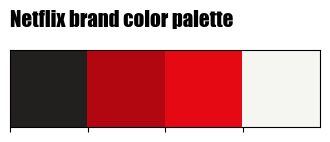

In [23]:

colors = ['#221f1f', '#b20710', '#e50914', '#f5f5f1']
sns.palplot(colors)
plt.title("Netflix brand color palette", 
          loc='left', 
          fontfamily='Fantasy', 
          fontsize=15, y=1.2)
plt.show()


# Netflix Movie & TV show 비율 시각화

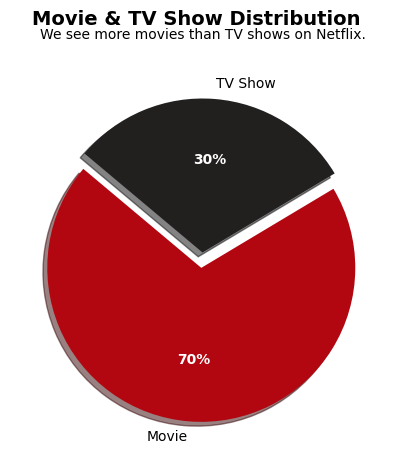

In [24]:
import matplotlib.pyplot as plt

type_counts = netflix['type'].value_counts()
colors = ['#b20710', '#221f1f']

explode = (0.1, 0) 

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    type_counts, 
    labels=type_counts.index, 
    autopct='%1.0f%%', 
    startangle=140,  
    explode=explode, shadow=True, colors=colors
)


plt.setp(autotexts, size=10, weight='bold', color='white')

plt.suptitle('Movie & TV Show Distribution', fontweight='bold', fontsize=14)
plt.title('We see more movies than TV shows on Netflix.', fontsize=10, pad=15)

plt.show()

C:\Users\where\AppData\Local\Temp\ipykernel_31640\1638121094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette=['#b20710', '#221f1f'])


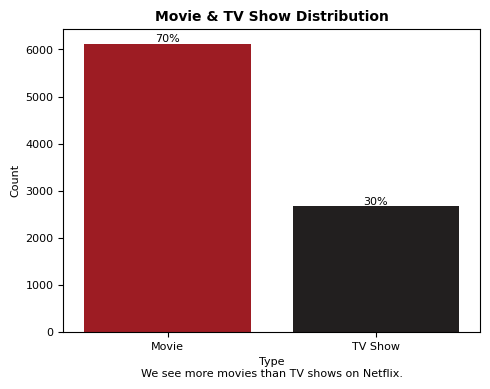

In [25]:
plt.figure(figsize=(5, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette=['#b20710', '#221f1f'])
for i, v in enumerate(type_counts.values):
    plt.text(i, v, f'{v/sum(type_counts)*100:.0f}%', ha='center', va='bottom', fontsize=8)
plt.title('Movie & TV Show Distribution', fontweight='bold', fontsize=10)
plt.xlabel('Type', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.text(0.5, -0.15, 'We see more movies than TV shows on Netflix.', ha='center', transform=plt.gca().transAxes, fontsize=8)
plt.tight_layout()
plt.show()

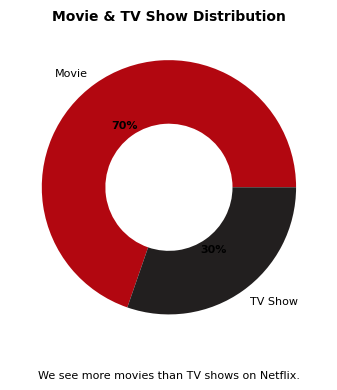

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(type_counts.values, labels=type_counts.index, autopct='%0.f%%', 
                                  colors=['#b20710', '#221f1f'], wedgeprops=dict(width=0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.setp(texts, size=8)
ax.set_title('Movie & TV Show Distribution', fontweight='bold', fontsize=10)
plt.text(0.5, -0.1, 'We see more movies than TV shows on Netflix.', ha='center', transform=ax.transAxes, fontsize=8)
plt.tight_layout()
plt.show()

# Netflix 연도별 수치 시각화


<Figure size 1500x500 with 0 Axes>

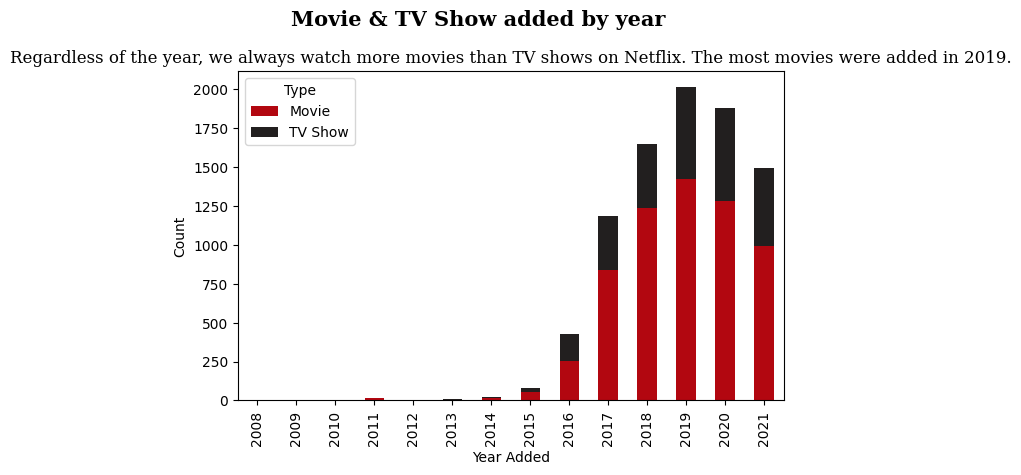

In [27]:
plt.figure(figsize=(15, 5))
netflix_grouped = netflix.groupby(['year_added', 'type']).size().unstack()
netflix_grouped.plot(kind='bar', stacked=True, color=['#b20710', '#221f1f'])

plt.suptitle('Movie & TV Show added by year', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('Regardless of the year, we always watch more movies than TV shows on Netflix. The most movies were added in 2019.', fontfamily='serif', fontsize=12)
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

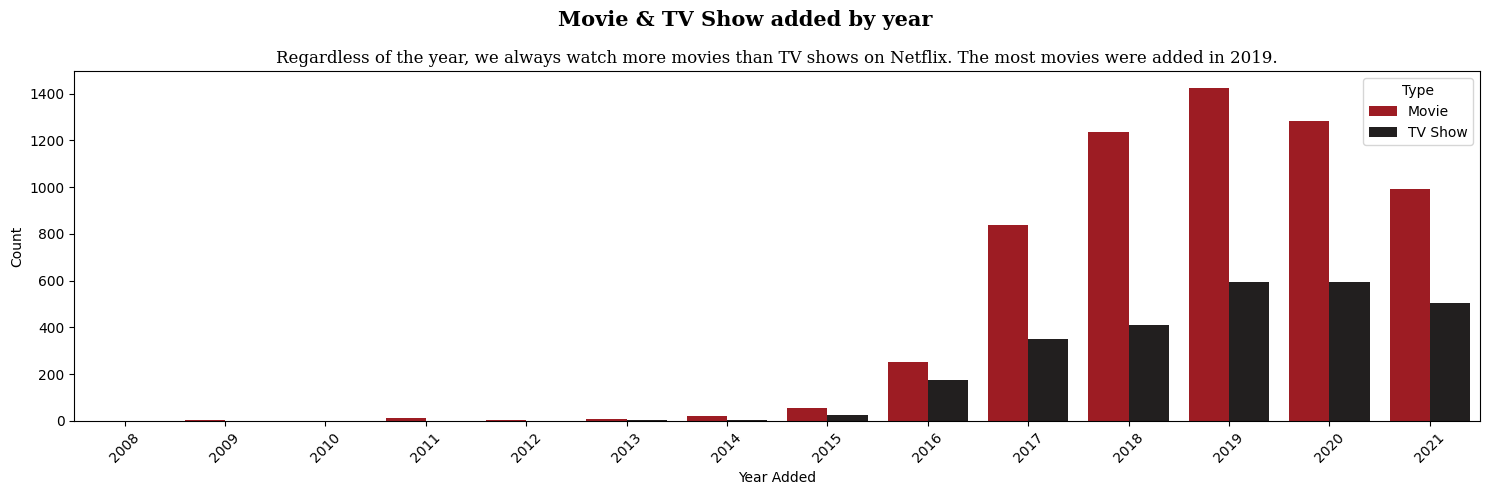

In [28]:
plt.figure(figsize=(15, 5))
sns.countplot(data=netflix, x='year_added', hue='type', palette=['#b20710', '#221f1f'])

plt.suptitle('Movie & TV Show added by year', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('Regardless of the year, we always watch more movies than TV shows on Netflix. The most movies were added in 2019.', fontfamily='serif', fontsize=12)
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Netflix 월별 수치 시각화


In [29]:
netflix['month_added'] = netflix['date_added'].dt.month

In [30]:
month_counts = netflix.groupby(['month_added', 'type']).size().unstack(fill_value=0)


In [31]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

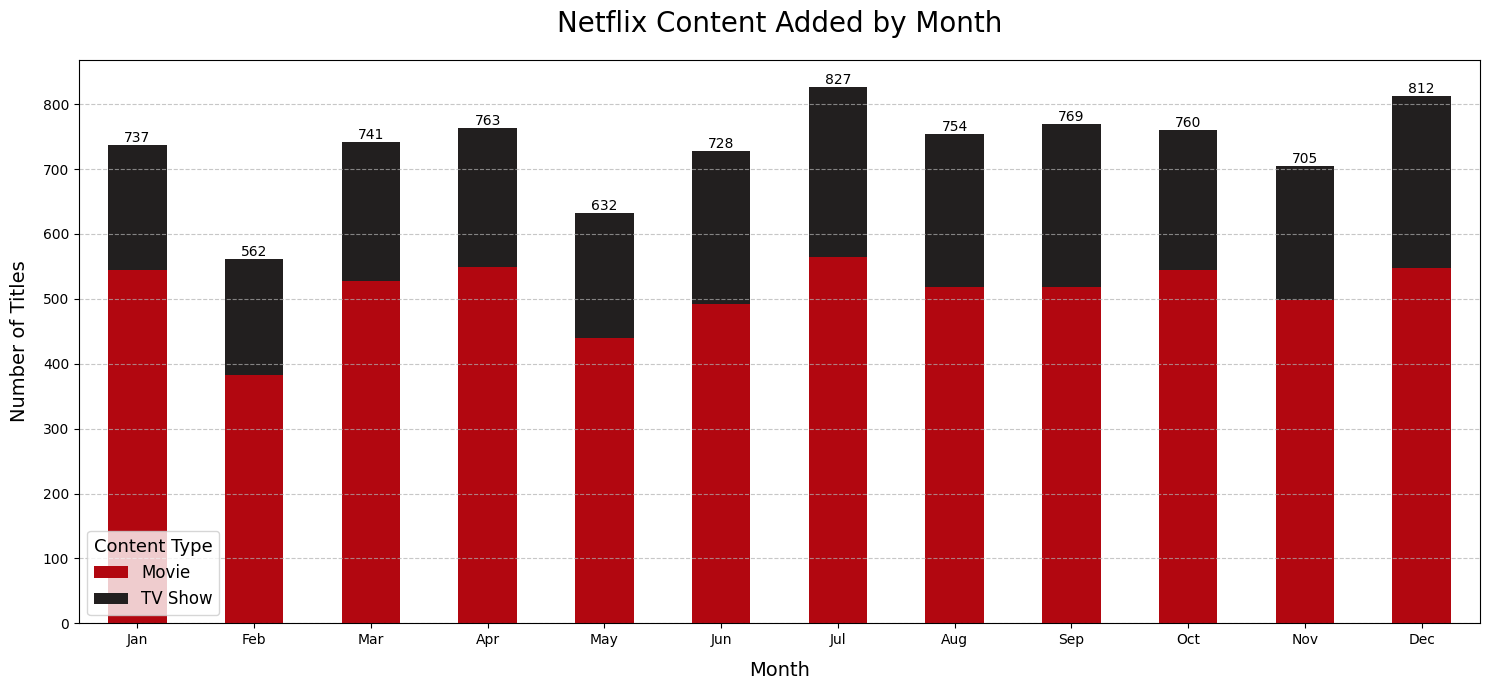

In [32]:
fig, ax = plt.subplots(figsize=(15, 7))
month_counts.plot(kind='bar', stacked=True, ax=ax, color=['#b20710', '#221f1f'])

plt.title('Netflix Content Added by Month', fontsize=20, pad=20)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Number of Titles', fontsize=14, labelpad=10)
plt.legend(title='Content Type', title_fontsize='13', fontsize='12')

plt.xticks(range(12), month_names, rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(month_counts)):
    total = sum(month_counts.iloc[i])
    plt.text(i, total, str(total), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Netflix 나라별 연령대 시각화

In [33]:
country_age = netflix.groupby('age_group')['country'].value_counts().unstack()
country_age

country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
age_group,,,,,,,,,,,,,,,,,,,,,
Adults,NaN,1.0,42.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,...,1.0,1.0,NaN,NaN,1.0,NaN,1.0,3.0,1.0,NaN
Kids,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
Older Kids,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Young Adults,1.0,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN


In [34]:
age_group = ['Kids','Older Kids','Teens','Adults']

country_group = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 
                 'France', 'South Korea', 'Spain', 'Mexico', 'Turkey']

In [35]:
country_age = country_age.loc[age_group, country_group]
country_age.fillna(0, inplace = True)
country_age

country,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Turkey
age_group,,,,,,,,,,
Kids,198.0,14.0,42.0,32.0,3.0,12.0,5.0,3.0,2.0,1.0
Older Kids,515.0,151.0,82.0,40.0,60.0,7.0,23.0,6.0,9.0,9.0
Teens,289.0,4.0,8.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0
Adults,1403.0,253.0,214.0,80.0,87.0,83.0,88.0,122.0,85.0,64.0


In [36]:
country_age = country_age .div(country_age.sum(axis=0), axis=1)

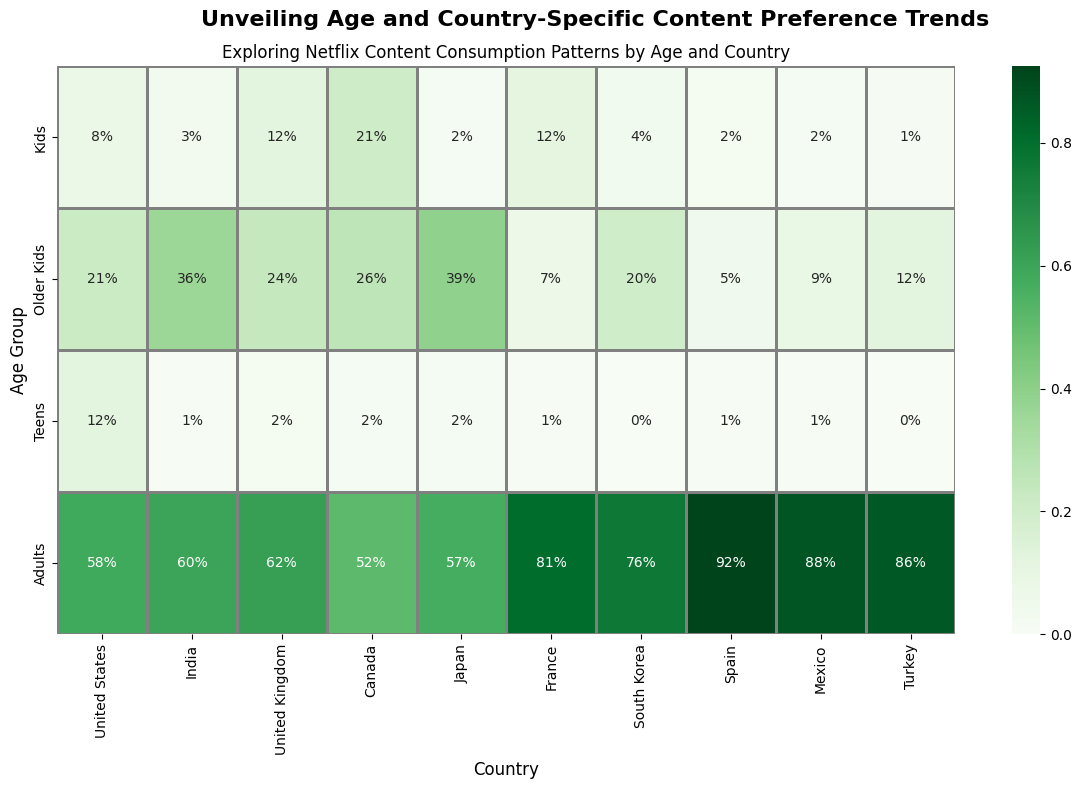

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(country_age, cmap='Greens', annot=True, fmt='.0%', linewidths=1, linecolor='gray')

plt.title('Exploring Netflix Content Consumption Patterns by Age and Country', fontsize=12)
plt.suptitle('Unveiling Age and Country-Specific Content Preference Trends', fontweight='bold', fontsize=16)

plt.xlabel('Country', fontsize=12)
plt.ylabel('Age Group', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# WordCloud

In [38]:
from wordcloud import WordCloud
from PIL import Image

In [39]:
plt.figure(figsize=(15, 5))
text = str(list(netflix['description']))

<Figure size 1500x500 with 0 Axes>

In [40]:
text = " ".join(description for description in netflix['description'])

In [41]:
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=150, colormap='Blues').generate(text)

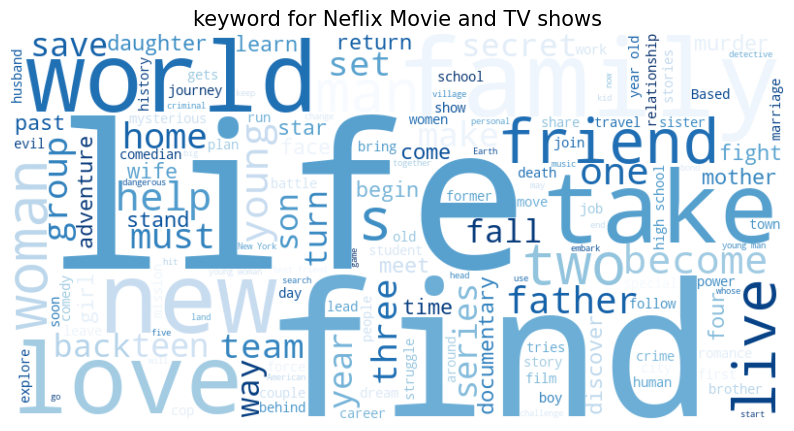

In [42]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('keyword for Neflix Movie and TV shows', fontsize=15)
plt.axis('off')
plt.show()
